In [1]:
import requests
from time import sleep

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

from collections import defaultdict
import config
import time
from tqdm import tqdm_notebook

In [2]:
class ENV1:
    def __init__(self, url, key):
        self.url = url
        self.key = key

    def reset(self):
        r = requests.get(url=self.url+'/reset',
                     params = {
                         'user_id':self.key,
                     })
        try:
            return r.json()
        except:
            print(r.content)
            raise

    def predict(self, predicted_score):
        r = requests.get(url=self.url + '/predict',
                     params = {
                         'user_id':self.key,
                         'predicted_score':predicted_score
                     })
        try:
            return r.json()
        except:
            print(r.content)
            raise




In [3]:
from models.env1 import Random, DeepMFAgent, CorrelationAgent, Constant, SVDAgent, DeepMFCovariatesAgent

/home/anton/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
results = defaultdict(lambda: defaultdict(list)) 
# modelname :   predicted  : list  with shape n_runs x n_steps
#               true       : list  with shape n_runs x n_steps

In [6]:
%%time
ENV_URL = config.ENV1_URL
KEY = config.KEY

env = ENV1(key=KEY, url=ENV_URL)

n_runs = 3
n_steps = 100

models = {
   'Random' : Random(),
    'Constant=3' : Constant(3),
    'CorrelationAgent' : CorrelationAgent(),
    'SVD' : SVDAgent(),
    'DeepMFAgent_emb30' : DeepMFAgent(embedding_size=30),
    'DeepMFAgent_emb30_mse_retrain' : DeepMFAgent(embedding_size=30, loss_name='mse', retrain=True, retrain_after=20),
    'DeepMFCovariatesAgent' : DeepMFCovariatesAgent(embedding_size = 30, covar_dim=5, loss_name='mse', retrain=False, retrain_after=20)
}

for model_name, model in models.items():
    
    model_name_entry = model_name + '_' + time.strftime('%H:%M')
    
    for n in tqdm_notebook(range(n_runs), desc=model_name, leave=True, position=0):
        # init model 
        history = env.reset()
        model.train(history)
        input_data = {
            'next_user' : history['next_user'],
            'next_item' : history['next_item'],
            'next_variables' : history.get('next_variables', None)
        }
        
        
        true_scores = []
        pred_scores = []
        
        for _ in tqdm_notebook(range(n_steps), desc='run %d' % n, leave=False, position=1):
            time.sleep(0.05)
            
            prediction = model.predict(input_data)
            res = env.predict(prediction) # get res for prediction
            
            input_data = {
                'next_user' : res['next_user'],
                'next_item' : res['next_item'],
                'next_variables' : res.get('variables', None)
            }
            true_score = res['rating']
            
            true_scores.append(true_score)
            pred_scores.append(prediction)
            
            model.store_reward(true_score)
            
            
        results[model_name_entry]['true'].append(true_scores)
        results[model_name_entry]['predicted'].append(pred_scores)

Train on 1800 samples, validate on 200 samples
Epoch 1/40
1800/1800 [==============================] - 1s 526us/step - loss: 9.9260 - val_loss: 10.6616
Epoch 2/40
1800/1800 [==============================] - 0s 22us/step - loss: 9.9101 - val_loss: 10.6608
Epoch 3/40
1800/1800 [==============================] - 0s 24us/step - loss: 9.8938 - val_loss: 10.6592
Epoch 4/40
1800/1800 [==============================] - 0s 27us/step - loss: 9.8728 - val_loss: 10.6550
Epoch 5/40
1800/1800 [==============================] - 0s 25us/step - loss: 9.8436 - val_loss: 10.6472
Epoch 6/40
1800/1800 [==============================] - 0s 24us/step - loss: 9.8024 - val_loss: 10.6316
Epoch 7/40
1800/1800 [==============================] - 0s 26us/step - loss: 9.7439 - val_loss: 10.6048
Epoch 8/40
1800/1800 [==============================] - 0s 24us/step - loss: 9.6613 - val_loss: 10.5613
Epoch 9/40
1800/1800 [==============================] - 0s 24us/step - loss: 9.5498 - val_loss: 10.4933
Epoch 10/40
1800

Train on 1800 samples, validate on 200 samples
Epoch 1/40
1800/1800 [==============================] - 0s 121us/step - loss: 10.2657 - val_loss: 10.0148
Epoch 2/40
1800/1800 [==============================] - 0s 23us/step - loss: 10.2498 - val_loss: 10.0141
Epoch 3/40
1800/1800 [==============================] - 0s 23us/step - loss: 10.2336 - val_loss: 10.0119
Epoch 4/40
1800/1800 [==============================] - 0s 30us/step - loss: 10.2127 - val_loss: 10.0072
Epoch 5/40
1800/1800 [==============================] - 0s 24us/step - loss: 10.1838 - val_loss: 9.9979
Epoch 6/40
1800/1800 [==============================] - 0s 24us/step - loss: 10.1429 - val_loss: 9.9811
Epoch 7/40
1800/1800 [==============================] - 0s 25us/step - loss: 10.0852 - val_loss: 9.9528
Epoch 8/40
1800/1800 [==============================] - 0s 28us/step - loss: 10.0052 - val_loss: 9.9088
Epoch 9/40
1800/1800 [==============================] - 0s 25us/step - loss: 9.8976 - val_loss: 9.8422
Epoch 10/40
1

Train on 1800 samples, validate on 200 samples
Epoch 1/40
1800/1800 [==============================] - 0s 142us/step - loss: 10.2315 - val_loss: 10.3389
Epoch 2/40
1800/1800 [==============================] - 0s 25us/step - loss: 10.2151 - val_loss: 10.3385
Epoch 3/40
1800/1800 [==============================] - 0s 28us/step - loss: 10.1983 - val_loss: 10.3368
Epoch 4/40
1800/1800 [==============================] - 0s 25us/step - loss: 10.1760 - val_loss: 10.3324
Epoch 5/40
1800/1800 [==============================] - 0s 25us/step - loss: 10.1444 - val_loss: 10.3229
Epoch 6/40
1800/1800 [==============================] - 0s 21us/step - loss: 10.0998 - val_loss: 10.3053
Epoch 7/40
1800/1800 [==============================] - 0s 23us/step - loss: 10.0358 - val_loss: 10.2739
Epoch 8/40
1800/1800 [==============================] - 0s 23us/step - loss: 9.9459 - val_loss: 10.2232
Epoch 9/40
1800/1800 [==============================] - 0s 27us/step - loss: 9.8230 - val_loss: 10.1448
Epoch 10/

Train on 1800 samples, validate on 200 samples
Epoch 1/40
1800/1800 [==============================] - 0s 149us/step - loss: 10.1126 - val_loss: 10.9551
Epoch 2/40
1800/1800 [==============================] - 0s 22us/step - loss: 10.0964 - val_loss: 10.9548
Epoch 3/40
1800/1800 [==============================] - 0s 25us/step - loss: 10.0804 - val_loss: 10.9539
Epoch 4/40
1800/1800 [==============================] - 0s 27us/step - loss: 10.0598 - val_loss: 10.9515
Epoch 5/40
1800/1800 [==============================] - 0s 33us/step - loss: 10.0318 - val_loss: 10.9458
Epoch 6/40
1800/1800 [==============================] - 0s 31us/step - loss: 9.9928 - val_loss: 10.9353
Epoch 7/40
1800/1800 [==============================] - 0s 28us/step - loss: 9.9391 - val_loss: 10.9158
Epoch 8/40
1800/1800 [==============================] - 0s 24us/step - loss: 9.8647 - val_loss: 10.8837
Epoch 9/40
1800/1800 [==============================] - 0s 25us/step - loss: 9.7647 - val_loss: 10.8319
Epoch 10/40

Train on 17 samples, validate on 2 samples
Epoch 1/10
17/17 [==============================] - 0s 760us/step - loss: 9.7578 - val_loss: 16.0000
Epoch 2/10
17/17 [==============================] - 0s 704us/step - loss: 9.6281 - val_loss: 16.0000
Epoch 3/10
17/17 [==============================] - 0s 646us/step - loss: 9.4909 - val_loss: 16.0000
Epoch 4/10
17/17 [==============================] - 0s 585us/step - loss: 9.3686 - val_loss: 16.0000
Epoch 5/10
17/17 [==============================] - 0s 474us/step - loss: 9.2423 - val_loss: 16.0000
Epoch 6/10
17/17 [==============================] - 0s 790us/step - loss: 9.1367 - val_loss: 16.0000
Epoch 7/10
17/17 [==============================] - 0s 643us/step - loss: 9.0200 - val_loss: 16.0000
Epoch 8/10
17/17 [==============================] - 0s 699us/step - loss: 8.9640 - val_loss: 16.0000
Epoch 9/10
17/17 [==============================] - 0s 591us/step - loss: 8.8692 - val_loss: 16.0000
Epoch 10/10
17/17 [=============================

1800/1800 [==============================] - 0s 24us/step - loss: 2.6459 - val_loss: 4.0914
Epoch 29/40
1800/1800 [==============================] - 0s 24us/step - loss: 2.3241 - val_loss: 3.7288
Epoch 30/40
1800/1800 [==============================] - 0s 25us/step - loss: 2.0306 - val_loss: 3.4081
Epoch 31/40
1800/1800 [==============================] - 0s 24us/step - loss: 1.7772 - val_loss: 3.1094
Epoch 32/40
1800/1800 [==============================] - 0s 23us/step - loss: 1.5567 - val_loss: 2.8492
Epoch 33/40
1800/1800 [==============================] - 0s 26us/step - loss: 1.3648 - val_loss: 2.6135
Epoch 34/40
1800/1800 [==============================] - 0s 27us/step - loss: 1.1979 - val_loss: 2.4051
Epoch 35/40
1800/1800 [==============================] - 0s 25us/step - loss: 1.0564 - val_loss: 2.2201
Epoch 36/40
1800/1800 [==============================] - 0s 25us/step - loss: 0.9326 - val_loss: 2.0606
Epoch 37/40
1800/1800 [==============================] - 0s 24us/step - loss

Train on 17 samples, validate on 2 samples
Epoch 1/10
17/17 [==============================] - 0s 915us/step - loss: 7.6907 - val_loss: 20.5000
Epoch 2/10
17/17 [==============================] - 0s 956us/step - loss: 7.5114 - val_loss: 20.5000
Epoch 3/10
17/17 [==============================] - 0s 618us/step - loss: 7.3100 - val_loss: 20.5000
Epoch 4/10
17/17 [==============================] - 0s 777us/step - loss: 7.0967 - val_loss: 20.5000
Epoch 5/10
17/17 [==============================] - 0s 766us/step - loss: 6.9382 - val_loss: 20.5000
Epoch 6/10
17/17 [==============================] - 0s 963us/step - loss: 6.8061 - val_loss: 20.5000
Epoch 7/10
17/17 [==============================] - 0s 869us/step - loss: 6.6961 - val_loss: 20.5000
Epoch 8/10
17/17 [==============================] - 0s 620us/step - loss: 6.6070 - val_loss: 20.5000
Epoch 9/10
17/17 [==============================] - 0s 822us/step - loss: 6.5567 - val_loss: 20.5000
Epoch 10/10
17/17 [=============================

Epoch 29/40
1800/1800 [==============================] - 0s 23us/step - loss: 2.8219 - val_loss: 4.5287
Epoch 30/40
1800/1800 [==============================] - 0s 22us/step - loss: 2.4890 - val_loss: 4.2067
Epoch 31/40
1800/1800 [==============================] - 0s 24us/step - loss: 2.1904 - val_loss: 3.9084
Epoch 32/40
1800/1800 [==============================] - 0s 26us/step - loss: 1.9264 - val_loss: 3.6325
Epoch 33/40
1800/1800 [==============================] - 0s 23us/step - loss: 1.6922 - val_loss: 3.3847
Epoch 34/40
1800/1800 [==============================] - 0s 25us/step - loss: 1.4886 - val_loss: 3.1609
Epoch 35/40
1800/1800 [==============================] - 0s 26us/step - loss: 1.3097 - val_loss: 2.9585
Epoch 36/40
1800/1800 [==============================] - 0s 26us/step - loss: 1.1562 - val_loss: 2.7809
Epoch 37/40
1800/1800 [==============================] - 0s 23us/step - loss: 1.0251 - val_loss: 2.6153
Epoch 38/40
1800/1800 [==============================] - 0s 26us

Train on 17 samples, validate on 2 samples
Epoch 1/10
17/17 [==============================] - 0s 844us/step - loss: 8.4083 - val_loss: 5.0000
Epoch 2/10
17/17 [==============================] - 0s 815us/step - loss: 8.2514 - val_loss: 5.0000
Epoch 3/10
17/17 [==============================] - 0s 668us/step - loss: 8.0151 - val_loss: 5.0000
Epoch 4/10
17/17 [==============================] - 0s 791us/step - loss: 7.8282 - val_loss: 5.0000
Epoch 5/10
17/17 [==============================] - 0s 801us/step - loss: 7.6885 - val_loss: 5.0000
Epoch 6/10
17/17 [==============================] - 0s 626us/step - loss: 7.5567 - val_loss: 5.0000
Epoch 7/10
17/17 [==============================] - 0s 713us/step - loss: 7.4189 - val_loss: 5.0000
Epoch 8/10
17/17 [==============================] - 0s 769us/step - loss: 7.3279 - val_loss: 5.0000
Epoch 9/10
17/17 [==============================] - 0s 785us/step - loss: 7.2540 - val_loss: 5.0000
Epoch 10/10
17/17 [==============================] - 0s 5

Train on 1800 samples, validate on 200 samples
Epoch 1/60
1800/1800 [==============================] - 1s 436us/step - loss: 3.4982 - val_loss: 2.6350
Epoch 2/60
1800/1800 [==============================] - 0s 118us/step - loss: 1.6982 - val_loss: 1.2264
Epoch 3/60
1800/1800 [==============================] - 0s 113us/step - loss: 0.8471 - val_loss: 0.9663
Epoch 4/60
1800/1800 [==============================] - 0s 122us/step - loss: 0.7258 - val_loss: 0.9499
Epoch 5/60
1800/1800 [==============================] - 0s 116us/step - loss: 0.6914 - val_loss: 0.9302
Epoch 6/60
1800/1800 [==============================] - 0s 114us/step - loss: 0.6893 - val_loss: 0.9255
Epoch 7/60
1800/1800 [==============================] - 0s 119us/step - loss: 0.6863 - val_loss: 0.9060
Epoch 8/60
1800/1800 [==============================] - 0s 112us/step - loss: 0.6704 - val_loss: 0.9458
Epoch 9/60
1800/1800 [==============================] - 0s 121us/step - loss: 0.6697 - val_loss: 0.9639
Epoch 10/60
1800/

Train on 1800 samples, validate on 200 samples
Epoch 1/60
1800/1800 [==============================] - 1s 466us/step - loss: 4.0927 - val_loss: 2.3999
Epoch 2/60
1800/1800 [==============================] - 0s 119us/step - loss: 1.9578 - val_loss: 1.3559
Epoch 3/60
1800/1800 [==============================] - 0s 121us/step - loss: 0.9662 - val_loss: 1.0331
Epoch 4/60
1800/1800 [==============================] - 0s 117us/step - loss: 0.7449 - val_loss: 0.9244
Epoch 5/60
1800/1800 [==============================] - 0s 119us/step - loss: 0.6715 - val_loss: 0.8713
Epoch 6/60
1800/1800 [==============================] - 0s 119us/step - loss: 0.6537 - val_loss: 0.8920
Epoch 7/60
1800/1800 [==============================] - 0s 116us/step - loss: 0.6567 - val_loss: 0.8915
Epoch 8/60
1800/1800 [==============================] - 0s 128us/step - loss: 0.6329 - val_loss: 0.8783
Epoch 9/60
1800/1800 [==============================] - 0s 119us/step - loss: 0.6671 - val_loss: 0.9197
Epoch 10/60
1800/

Train on 1800 samples, validate on 200 samples
Epoch 1/60
1800/1800 [==============================] - 1s 462us/step - loss: 3.7842 - val_loss: 2.5980
Epoch 2/60
1800/1800 [==============================] - 0s 122us/step - loss: 1.8817 - val_loss: 1.4129
Epoch 3/60
1800/1800 [==============================] - 0s 119us/step - loss: 0.9359 - val_loss: 1.0975
Epoch 4/60
1800/1800 [==============================] - 0s 120us/step - loss: 0.7254 - val_loss: 0.9937
Epoch 5/60
1800/1800 [==============================] - 0s 118us/step - loss: 0.6813 - val_loss: 1.0247
Epoch 6/60
1800/1800 [==============================] - 0s 114us/step - loss: 0.6607 - val_loss: 0.9979
Epoch 7/60
1800/1800 [==============================] - 0s 124us/step - loss: 0.6462 - val_loss: 1.0179
Epoch 8/60
1800/1800 [==============================] - 0s 118us/step - loss: 0.6408 - val_loss: 1.0152
Epoch 9/60
1800/1800 [==============================] - 0s 117us/step - loss: 0.6434 - val_loss: 1.0317
Epoch 10/60
1800/


CPU times: user 2min 11s, sys: 16.3 s, total: 2min 27s
Wall time: 4min 11s


In [7]:
from utils import plot_model_moving_mse_mae

,Model,mae,mse
6,DeepMFCovariatesAgent_03:19,0.777627,0.955408
3,SVD_03:18,0.930348,1.305864
4,DeepMFAgent_emb30_03:18,0.966834,1.597390
5,DeepMFAgent_emb30_mse_retrain_03:19,1.053876,1.857297
1,Constant=3_03:17,1.153333,1.913333
2,CorrelationAgent_03:17,1.219336,2.550217
0,Random_03:16,1.593333,3.900000


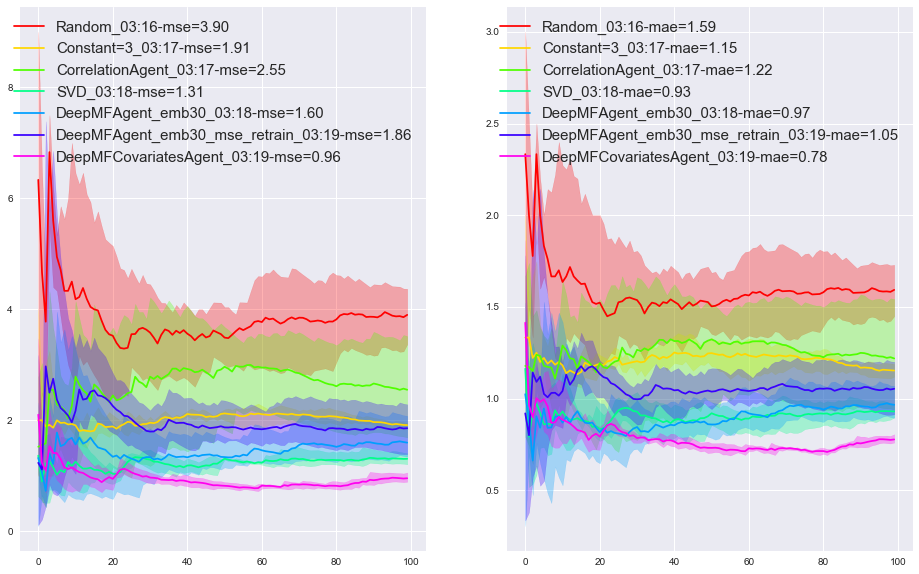

In [8]:
plot_model_moving_mse_mae(results)